In [8]:
import cv2 as cv
import numpy as np
from find_object import FindObject

image = cv.imread('inputs/img.png')
image = cv.resize(image, (0, 0), fx=0.25, fy=0.25)
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
hsv_image = cv.cvtColor(image, cv.COLOR_RGB2HSV)

light_orange = (0, 140, 0)
dark_orange = (100, 255, 255)
light_white = (0, 100, 0)
dark_white = (180, 255, 255)
light_black = (170, 0, 0)
dark_black = (180, 255, 255)
mask_orange = cv.inRange(hsv_image, light_orange, dark_orange)
mask_white = cv.inRange(hsv_image, light_white, dark_white)
mask_white = cv.bitwise_not(mask_white)
mask_black = cv.inRange(hsv_image, light_black, dark_black)
mask = mask_orange + mask_white + mask_black
mask = np.clip(mask, 0, 255).astype(np.uint8)

In [9]:
model = FindObject(RGB_image=image, image_mask=mask)

In [10]:
import matplotlib.pyplot as plt
# %matplotlib qt

100%|██████████| 41750/41750 [02:00<00:00, 347.07it/s]


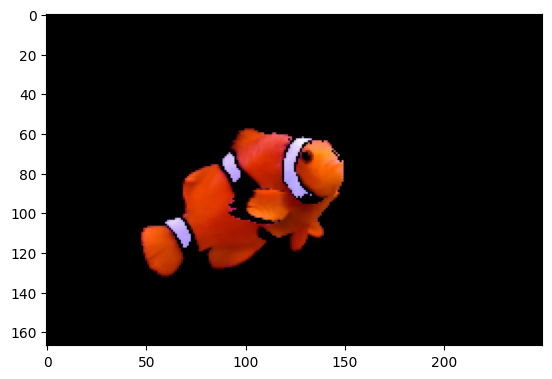

In [11]:
new_image = cv.imread('inputs/img.png')
new_image = cv.resize(new_image, (0, 0), fx=0.25, fy=0.25)
new_image = cv.cvtColor(new_image, cv.COLOR_BGR2RGB)
output = model.remove_background(new_image)

plt.imshow(output)
plt.show()

100%|██████████| 13932/13932 [00:31<00:00, 438.28it/s]


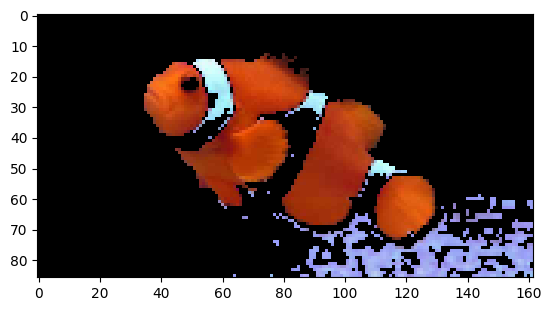

In [12]:
new_image = cv.imread('inputs/img_1.png')
new_image = cv.resize(new_image, (0, 0), fx=0.25, fy=0.25)
new_image = cv.cvtColor(new_image, cv.COLOR_BGR2RGB)
output = model.remove_background(new_image)

plt.imshow(output)
plt.show()